# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | chonchi
Processing Record 5 of Set 1 | shawinigan
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | kataragama
City not found. Skipping...
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | limassol
Processing Record 11 of Set 1 | horta
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | picos
Processing Record 16 of Set 1 | carutapera
Processing Record 17 of Set 1 | pascagoula
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | port-aux-francais
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-21.35,99,100,2.52,RU,1709683754
1,margaret river,-33.9500,115.0667,14.89,76,5,5.69,AU,1709683774
2,ushuaia,-54.8000,-68.3000,9.44,95,94,2.43,AR,1709683752
3,chonchi,-42.6128,-73.8092,14.56,89,60,1.86,CL,1709683774
4,shawinigan,46.5668,-72.7491,7.90,96,100,0.55,CA,1709684131


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/alexi/Desktop/WeatherPy/python-api-challenge/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/alexi/Desktop/WeatherPy/python-api-challenge/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-21.35,99,100,2.52,RU,1709683754
1,margaret river,-33.9500,115.0667,14.89,76,5,5.69,AU,1709683774
2,ushuaia,-54.8000,-68.3000,9.44,95,94,2.43,AR,1709683752
3,chonchi,-42.6128,-73.8092,14.56,89,60,1.86,CL,1709683774
4,shawinigan,46.5668,-72.7491,7.90,96,100,0.55,CA,1709684131


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

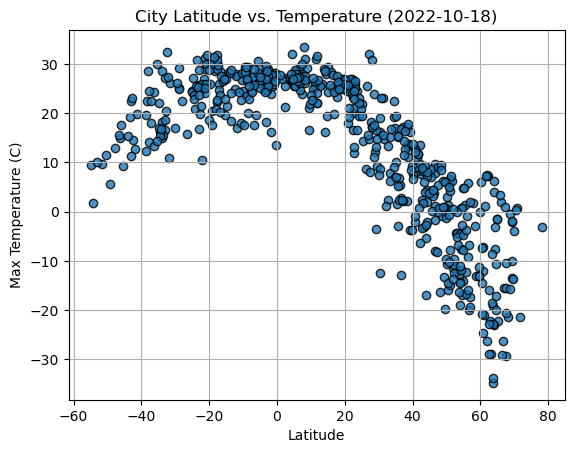

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/alexi/Desktop/WeatherPy/python-api-challenge/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

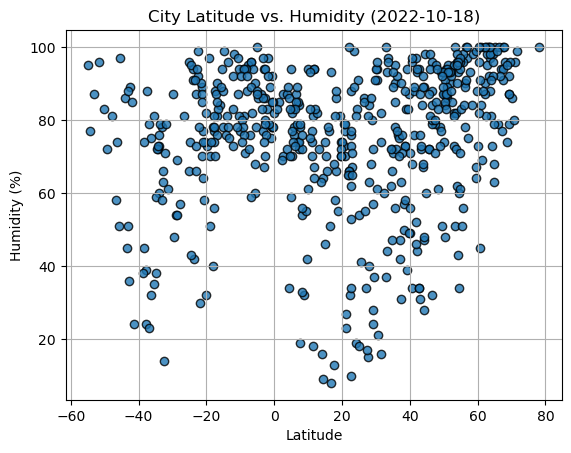

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/alexi/Desktop/WeatherPy/python-api-challenge/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

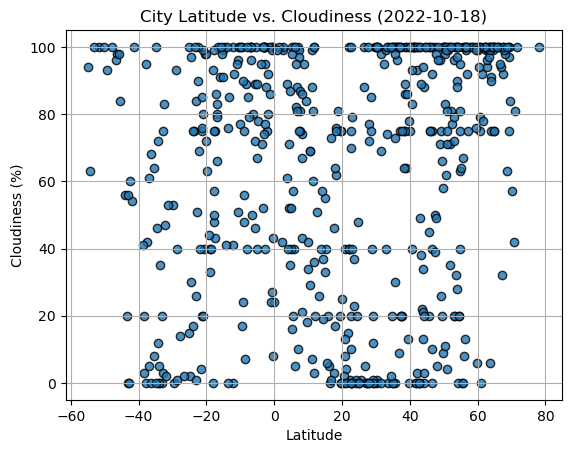

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/alexi/Desktop/WeatherPy/python-api-challenge/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

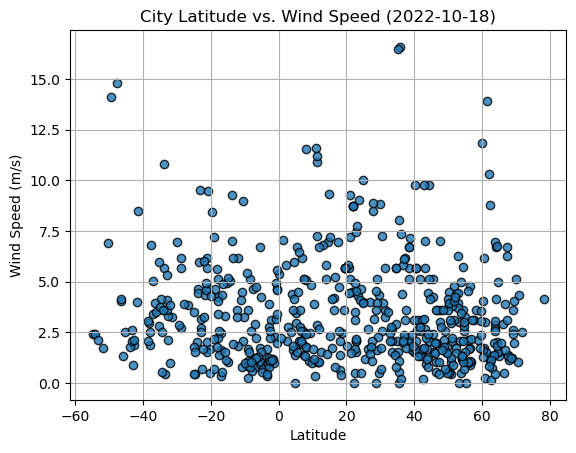

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/alexi/Desktop/WeatherPy/python-api-challenge/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-21.35,99,100,2.52,RU,1709683754
4,shawinigan,46.5668,-72.7491,7.90,96,100,0.55,CA,1709684131
7,constantia,44.1833,28.6500,4.38,89,88,4.42,RO,1709683771
8,limassol,34.6750,33.0333,17.04,72,20,5.66,CY,1709684340
9,horta,38.5333,-28.6333,13.34,73,89,6.71,PT,1709684083


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,14.89,76,5,5.69,AU,1709683774
2,ushuaia,-54.8000,-68.3000,9.44,95,94,2.43,AR,1709683752
3,chonchi,-42.6128,-73.8092,14.56,89,60,1.86,CL,1709683774
5,puerto natales,-51.7236,-72.4875,9.70,96,100,1.70,CL,1709683759
6,port mathurin,-19.6833,63.4167,25.99,73,63,8.43,MU,1709683793


###  Temperature vs. Latitude Linear Regression Plot

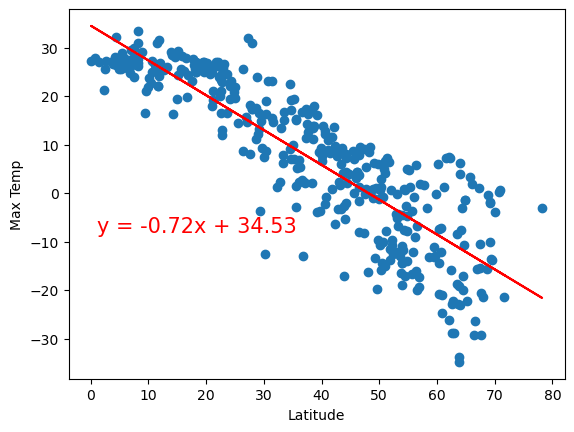

In [52]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1,-8), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

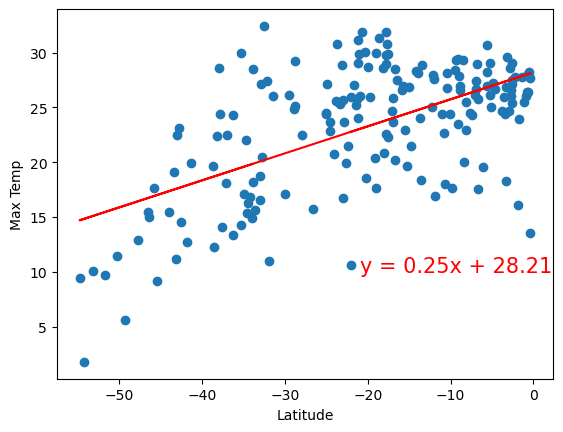

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-21,10), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 
The linear relationships for the "Temperature vs. Latitude Linear Regression Plots" in the Northern and Southern Hemisphere shows a negative and positive correlation. For the Northern Hemisphere plot describes a negative correlation, while the Southern Hemisphere describes a positive correlation. The Northern Hemisphere plot shows the distance from the equator increasing while the latitude increases. The max temperature will decrease further from the equator. The Southern Hemsiphere depicts the opposite, as the distance from the equator decreases, while latitude increases, and the max temperature increases closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

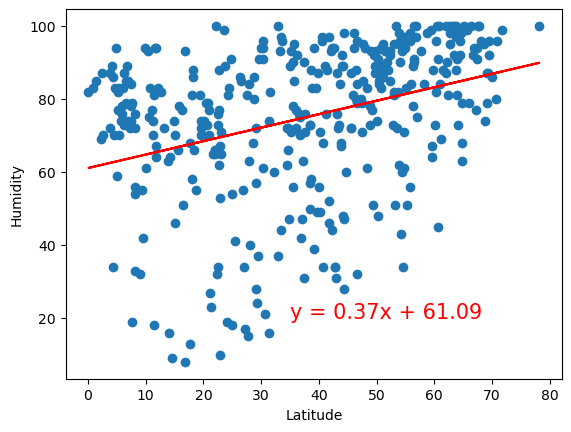

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(35,20), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

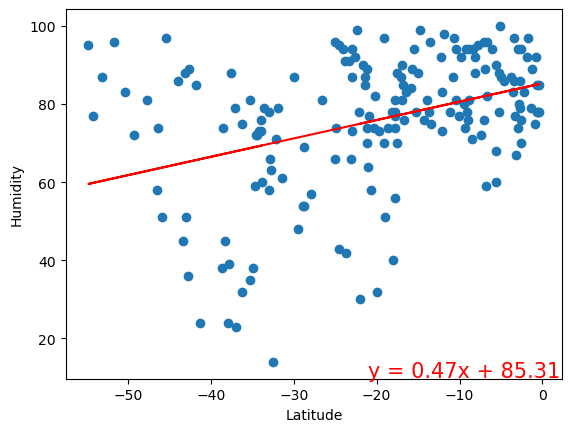

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-21,10), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
 The "Humidity vs. Latitude Linear Regression Plots" show both as positive correlations in the Northern and  Southern Hemisphere. The plot points seem to be more scattered and almost shows no correlation, but there is still a slight positive correlation for both.

### Cloudiness vs. Latitude Linear Regression Plot

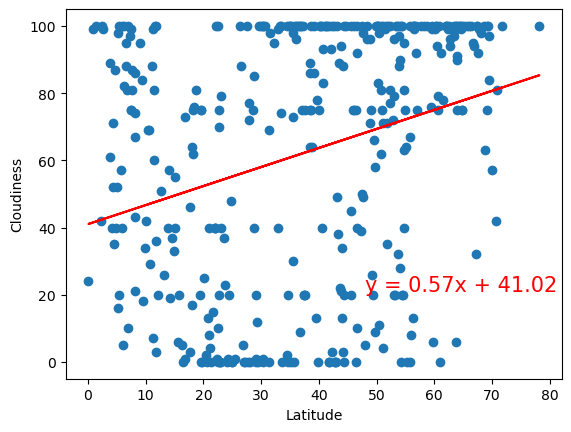

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(48,21), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

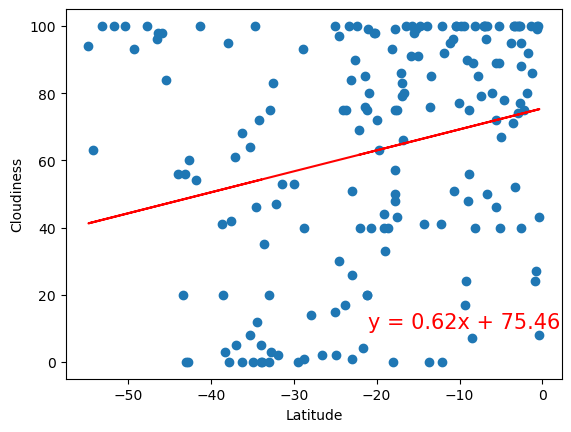

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-21,10), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 
As for the "Cloudiness vs. Latitude Linear Regression Plots", it seems to show both Northern and Southern Hemisphere plots as having no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

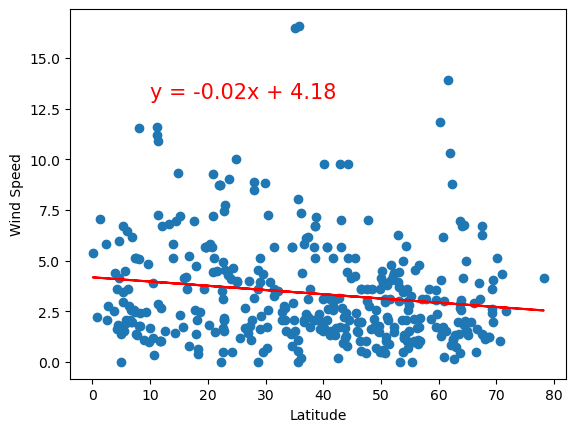

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,13), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

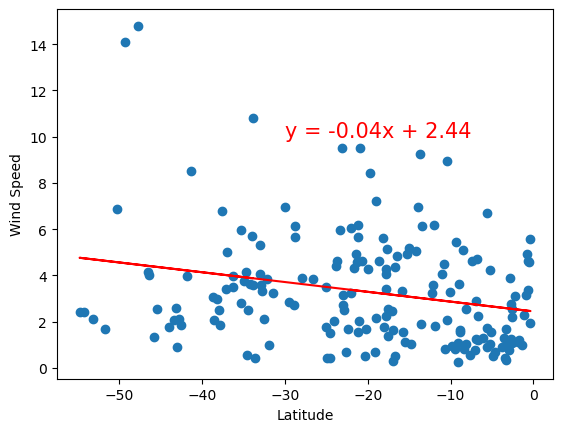

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,10), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** The "Wind Speed vs. Latitude Linear Regression Plots" seem to also show no correlation with both the Northern Hemisphere scatter plot, and the Southern Hemisphere plot.